<a href="https://colab.research.google.com/github/nickwinters1/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

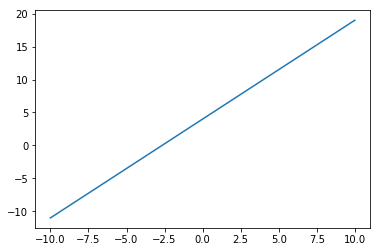

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10,10)
y = 1.5*x+4

plt.plot(x,y);
#Passes

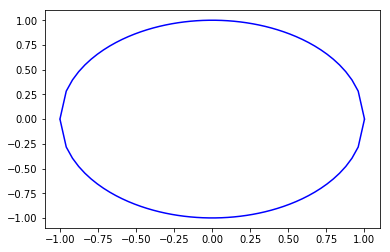

In [6]:
fig, (ax1) = plt.subplots(1)
x = np.linspace(-0.99999,0.99999)
y = (1-x**2)**0.5
ax1.plot(x,y,color='b')
ax1.plot(x,-y,color='b');
#Does not pass

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

They map a single input to multiple outputs

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 and Relation 4 pass the vertical line test, and the rest have inputs mapped to multiple outputs

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}


The dimension of the domain of m is 3, the codomain has dimension 4.
The dimension of the domain of n is 4, but the dimension of the codomain is 2.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

No, I do not belive its possible

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{bmatrix}
    1 & 3 \\
    -1 & 2
    \end{bmatrix}
 
 
 \begin{bmatrix}
    4 & 1 & 2 \\
    -1 & 2 & 3 \\
    5 & 1 & -2 \\
    \end{bmatrix}
 

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [7]:
TP = np.matrix('1,3;-1,2')
TQ = np.matrix('4,1,2;-1,2,3 ; 5,1,-2')
p_test = np.matrix('1;2')
q_test=np.matrix('1;2;3')

print(np.dot(TP,p_test)) 
print(np.array([1+3*2,2*2-1])) 

print(np.dot(TQ,q_test))
print(np.array([4*1+1*2+2*3,2*2-1+3*3,5*1-2*3+2])) 


[[7]
 [3]]
[7 3]
[[12]
 [12]
 [ 1]]
[12 12  1]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors provide a consistent way to describe the action of a linear transformation

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The result of high dimensional operations may be difficult and time consuming, which is vulnerable to errors.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

rule of thumb is at least 5 times as many observations as you have dimensions in your dataset, though some peopel are more extremem and say you should square the number of dimensions to get the number of observatiosn you need
Principal Component Analysis

The rule of thumb is at least 5 times as many observations as you have dimensions in your dataset

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [8]:
import pandas as pd
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
X = iris.copy().drop(['species'],axis=1)
y = iris['species'].copy()
Z = X.copy()
for col in X.columns:
  Z[col] = (Z[col] - Z[col].mean())/(Z[col].std())
Z_cov = Z.cov()
Z_cov

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [11]:
np.dot(X.T,X)/149

array([[35.05939597, 17.92604027, 23.38422819,  7.56812081],
       [17.92604027,  9.57751678, 11.2342953 ,  3.56731544],
       [23.38422819, 11.2342953 , 17.33557047,  5.83201342],
       [ 7.56812081,  3.56731544,  5.83201342,  2.02885906]])

In [12]:
Zcov = Z_cov.values
Z_vals, Z_vects = np.linalg.eig(Zcov)
print(Z_vals)
print(Z_vects)

[2.91081808 0.92122093 0.14735328 0.02060771]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [13]:
Zcov

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [14]:
for i in range (0,4):
  temp = np.dot(Zcov,Z_vects[:,i])
  print(temp)
  print([temp[j]/Z_vects[:,i][j] for j in range(0,len(temp))])

[ 1.52052876 -0.76657825  1.69192467  1.64639087]
[2.910818083752056, 2.9108180837520536, 2.910818083752054, 2.9108180837520536]
[-0.34298747 -0.85264201 -0.01943295 -0.06026238]
[0.921220930707224, 0.9212209307072246, 0.9212209307072347, 0.9212209307072219]
[-0.10624419  0.03566434  0.02076094  0.09339271]
[0.14735327830509537, 0.14735327830509667, 0.14735327830509698, 0.14735327830509629]
[ 0.00539913 -0.00255813 -0.01650995  0.01078909]
[0.02060770723562423, 0.020607707235623586, 0.02060770723562488, 0.020607707235624575]


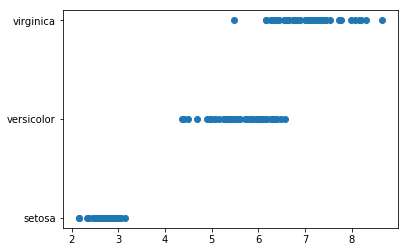

In [15]:
import matplotlib.pyplot as plt
P=Z_vects.T.dot(X.T)
plt.scatter(P[0],y);

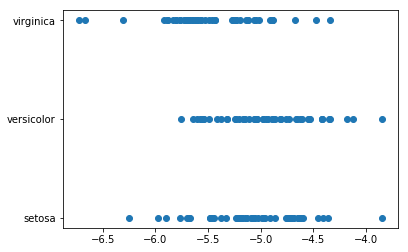

In [16]:
plt.scatter(P[1],y);

In [17]:
from numpy import array
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X)
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [18]:
pca.explained_variance_


array([4.22484077, 0.24224357])

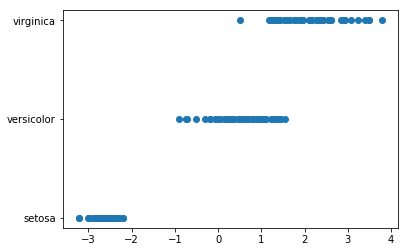

In [19]:
XT = pca.transform(X)
plt.scatter(XT[:,0],y)

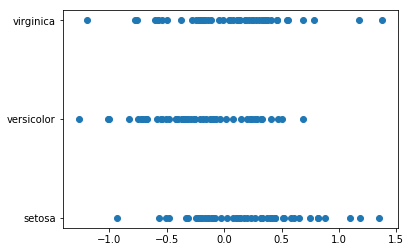

In [20]:
plt.scatter(XT[:,1],y)


# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)